## 1. Einleitung / Ziel des Projekts 🏠

In diesem Projekt untersuchen wir die Verkaufspreise von Häusern im Raum Seattle (King County, USA).  
Wir wollen die wichtigsten Preisfaktoren identifizieren, wie z. B.:
- **Wohnfläche, Zimmeranzahl, Baujahr, Zustand**
- **Einfluss der Lage (Wasserlage, Postleitzahl)**
- **Zusammenhänge zwischen Preis und Wohnqualität**

Ziel ist es, **Auffälligkeiten und Muster** im Immobilienmarkt zu erkennen.


## 2. Daten laden und Überblick 🧐

Wir starten mit dem Laden der Daten und einem ersten Überblick:
- **Wie viele Zeilen und Spalten gibt es?**
- **Welche Spalten sind enthalten?**
- **Gibt es fehlende Werte?**


In [1]:
# Bibliotheken importieren
import pandas as pd

# Daten laden
df = pd.read_csv("../data/kc_house_data.csv")

# Ersten Blick auf die Daten werfen
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Erste Datenprüfung 🧪

Ziel:
- **Größe des Datensatzes ermitteln**
- **Spaltennamen und Datentypen prüfen**
- **Fehlende Werte identifizieren**


In [2]:
# Größe des Datensatzes
df.shape

# Spaltennamen anzeigen
df.columns

# Datentypen und Speicherverbrauch prüfen
df.info()

# Fehlende Werte prüfen
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4. Daten bereinigen 🧹

Die Daten sind insgesamt **sauber** – keine fehlenden Werte.  
Einzig die `date`-Spalte liegt noch als `object` (Text) vor und wird jetzt in ein echtes **Datumsformat (datetime)** umgewandelt.


In [3]:
# Datumsspalte umwandeln
df['date'] = pd.to_datetime(df['date'])

# Prüfen, ob es geklappt hat
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Schritt 5: Explorative Datenanalyse (EDA)

Jetzt gehen wir die ersten spannenden Fragen an:

- ** Wie verteilen sich die Immobilienpreise? **
- ** Gibt es viele günstige oder eher teure Häuser? **
- ** Wie verteilen sich die Wohnflächen? **
- ** Sind die meisten Häuser klein oder groß? **
- ** Hat Wasserlage (waterfront) Einfluss auf den Preis? **
- ** Sind Häuser am Wasser teurer? **
- ** Welche Postleitzahlen haben die höchsten Preise? **	
- ** Gibt es teure Gegenden / Hotspots? **
- ** Wie entwickeln sich Preise über die Zeit? **	
- ** Steigen die Preise, oder gibt es Schwankungen? **

## 5.1 Verteilung der Immobilienpreise 💰📊

Wie verteilen sich die Hauspreise?  
Gibt es viele günstige Immobilien oder ziehen einige Luxusobjekte den Schnitt hoch?


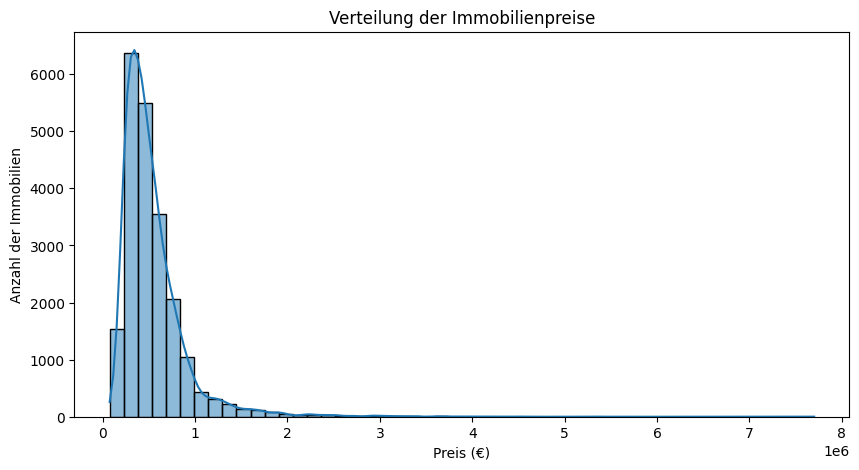

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)

plt.title("Verteilung der Immobilienpreise")
plt.xlabel("Preis (€)")
plt.ylabel("Anzahl der Immobilien")

plt.show()


## 5.2 Wohnfläche (sqft_living) – Verteilung 🏠📏

Wie groß sind die meisten Häuser?  
Gibt es viele kleine Häuser oder überwiegen große Immobilien?


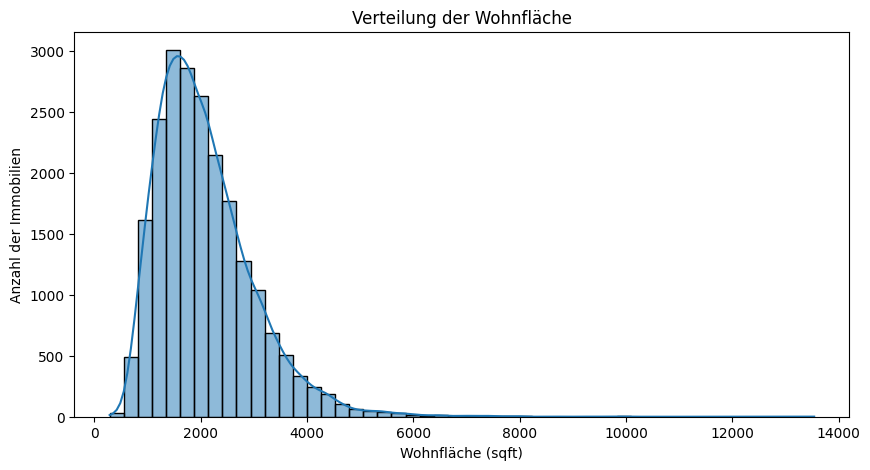

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sqft_living'], bins=50, kde=True)

plt.title("Verteilung der Wohnfläche")
plt.xlabel("Wohnfläche (sqft)")
plt.ylabel("Anzahl der Immobilien")

plt.show()


## 5.3 Wasserlage (waterfront) vs. Preis 🌊💰

Beeinflusst die Nähe zum Wasser den Immobilienpreis?  
Häuser mit Wasserlage (`waterfront = 1`) könnten teurer sein als Häuser ohne (`waterfront = 0`).


In [6]:
# Durchschnittspreis mit und ohne Wasserlage
waterfront_prices = df.groupby('waterfront')['price'].mean()

# Ausgabe der Durchschnittspreise
waterfront_prices


waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

/var/folders/yy/b7kbx5nj53l4y_x6xkz84z2r0000gn/T/ipykernel_43176/961395999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=waterfront_prices.index, y=waterfront_prices.values, palette='Blues')


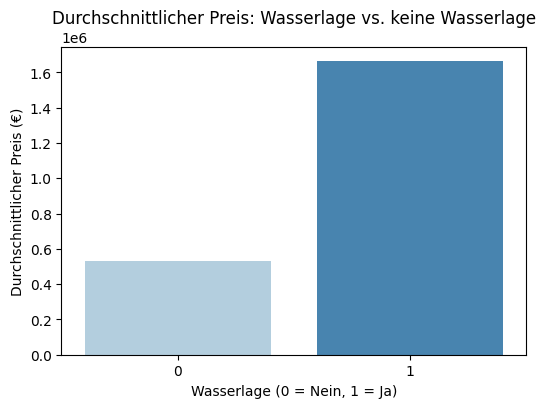

In [7]:
plt.figure(figsize=(6, 4))
sns.barplot(x=waterfront_prices.index, y=waterfront_prices.values, palette='Blues')

plt.title("Durchschnittlicher Preis: Wasserlage vs. keine Wasserlage")
plt.xlabel("Wasserlage (0 = Nein, 1 = Ja)")
plt.ylabel("Durchschnittlicher Preis (€)")

plt.show()
